# Equilíbrio líquido-vapor: diagramas T-xy

Nesse pequeno código, vamos construir um diagrama de equilíbrio líquido-vapor (ELV) do tipo T-xy. Os cálculos de ELV são, por vezes, iterativos, o que leva à necessidade de programas computacionais para nos auxiliar nessa tarefa. No nosso caso, vamos construir um diagrama T-xy sabendo-se previamente a **pressão** do sistema.

Primeiro, vamos chamar as bibliotecas que vamos precisar?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Agora, vamos enunciar o problema: construir o diagrama T-xy da mistura de **benzeno(1)/etilbenzeno(2)**, dada que a pressão é **P = 90 kPa**. A metodologia que vamos utilizar é a seguinte:

* Calcular as **temperaturas de saturação** das espécies (1) e (2) (T$_{sat,1}$ e T$_{sat,2}$), na pressão do sistema. Esses serão os pontos que delimitarão o nosso range de temperaturas avaliadas para a construção do diagrama;

T (ºC) = $\dfrac{B}{A - \ln P}$ - C

* Uma vez calculadas as temperaturas de saturação, vamos calcular as **pressões de saturação**:

$ \ln$ P (kPa) $ = A - \dfrac{B}{(T + C)} $

* Considerando que a leio de Raoult é válida, temos que:

P = x$_1$P$_1^{sat}$ + x$_2$P$_2^{sat} \therefore$ x$_1$ = $\dfrac{(P - P_2^{sat})}{(P_1^{sat} - P_2^{sat})}$

* E finalmente, a composição da espécie (1) na fase vapor (y$_1$) é dada por:

$ y_1 = \dfrac{(x_1P_1^{sat})}{P}$

Primeiro, vamos então definir os **parâmetros** que precisamos:

In [4]:
P = 90.0 #kPa

## Parâmetros de Antoine para o par benzeno/etilbenzeno, disponíveis na literatura.
A = [13.7819, 13.9726]
B = [2726.81, 3259.93]
C = [217.572, 212.300]

Podemos agora fazer os cálculos:

In [5]:
Tsat = [B[0] / (A[0] - np.log(P)) - C[0], B[1] / (A[1] - np.log(P)) - C[1]]
T = np.linspace(Tsat[0], Tsat[1], 100)
Psat = [np.exp(A[0] - B[0]/(T + C[0])), np.exp(A[1] - B[1]/(T + C[1]))]
x = (P - Psat[1]) / (Psat[0] - Psat[1])
y = (x * Psat[0]) / P

Vamos agora plotar o diagrama:

(0.0, 1.0)

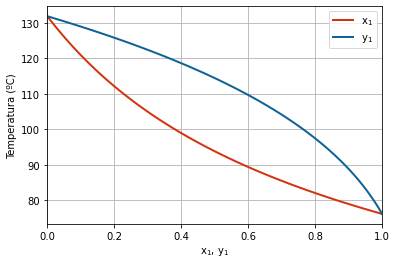

In [6]:
plt.plot(x, T, color = '#d43310', lw = 2.0, label = 'x$_1$')
plt.plot(y, T, color = '#0f6294', lw = 2.0, label = 'y$_1$')
plt.legend(loc = 'best')
plt.grid(True)
plt.xlabel(r'x$_1$, y$_1$')
plt.ylabel('Temperatura (ºC)')
plt.xlim([0.0,1.0])